In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Netflix dataset
url = "https://raw.githubusercontent.com/adamerose/datasets/master/netflix_titles.csv"
df = pd.read_csv(url)

# Preview the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Drop rows where 'type' or 'country' is missing and reset the index
df = df.dropna(subset=['type', 'country']).reset_index(drop=True)

# Fill missing 'rating' using .loc safely
df.loc[:, 'rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Fill missing 'duration'
df.loc[:, 'duration'] = df['duration'].fillna("Unknown")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Show missing values again
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         9
dtype: int64


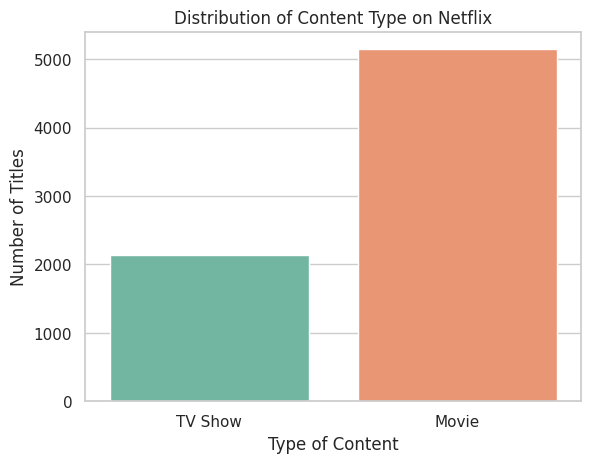

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)

# Titles and labels
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Number of Titles")

# Show plot
plt.show()

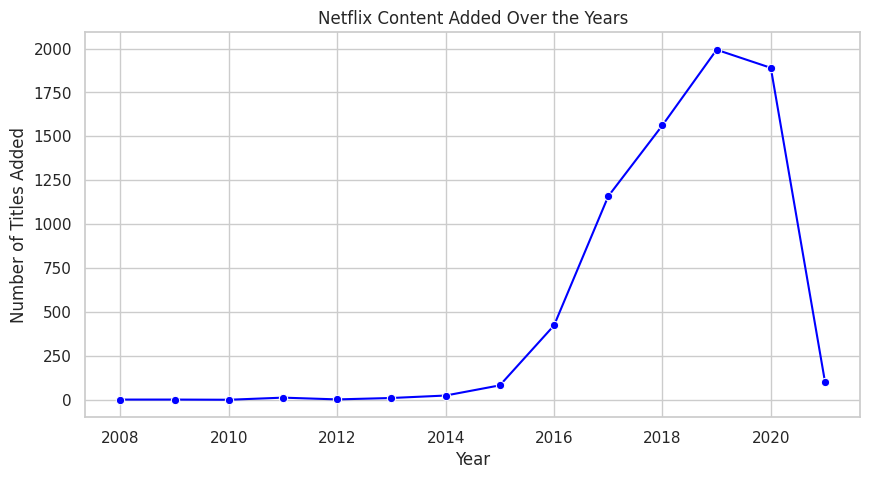

In [10]:
# Count titles added each year and convert to DataFrame
yearly_content = df['year_added'].value_counts().sort_index()
yearly_df = pd.DataFrame({'Year': yearly_content.index, 'Count': yearly_content.values})

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_df, x='Year', y='Count', marker='o', color='blue')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

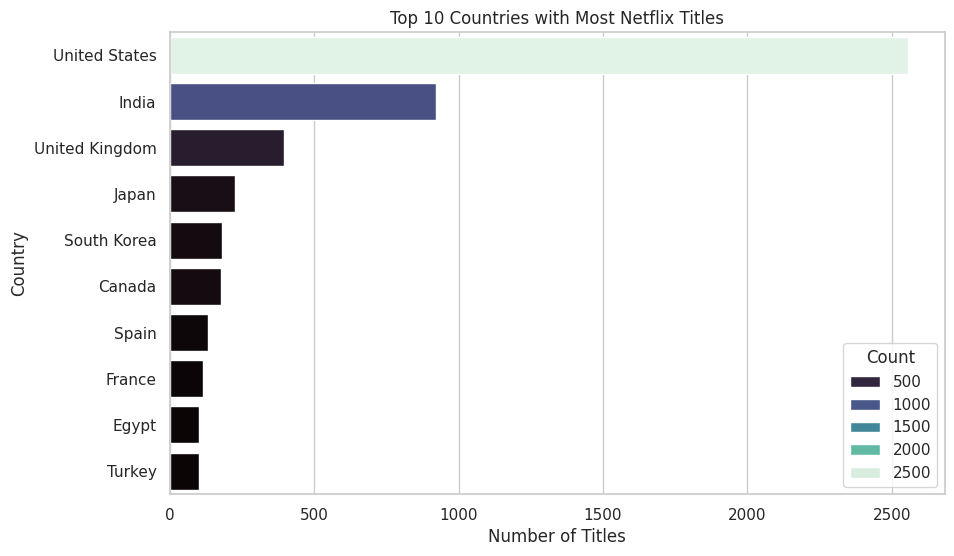

In [12]:
# Prepare top countries as DataFrame
top_countries = df['country'].value_counts().head(10)
country_df = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values})

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=country_df, y='Country', x='Count',hue ='Count', palette='mako')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

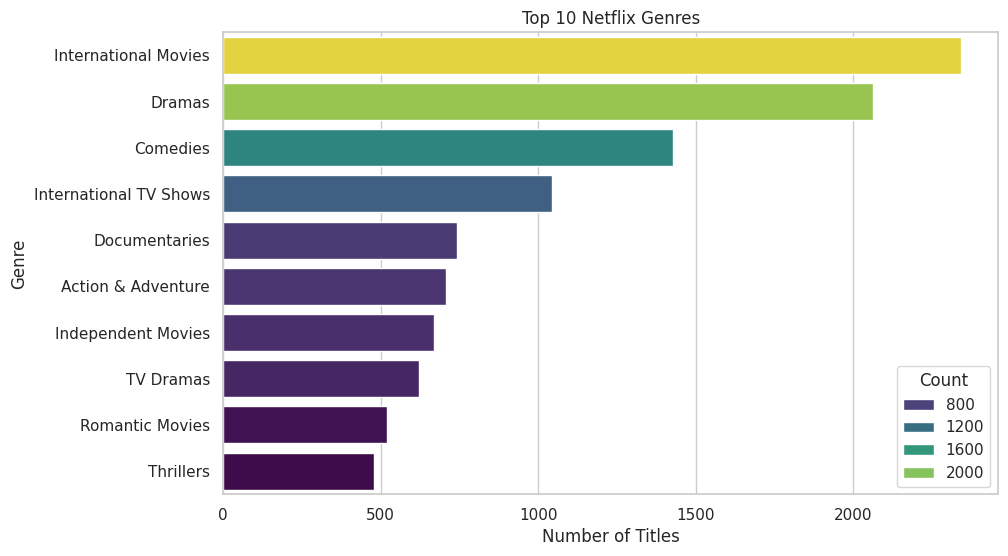

In [15]:
from collections import Counter

# Step 1: Drop null values in 'listed_in' just to be safe
genre_data = df['listed_in'].dropna()

# Step 2: Split the genre strings into lists
genre_lists = genre_data.apply(lambda x: x.split(', '))

# Step 3: Flatten the list of lists into one big list of genres
all_genres = sum(genre_lists.tolist(), [])

# Step 4: Count the top 10 most common genres
top_genres = Counter(all_genres).most_common(10)

# Step 5: Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df, y='Genre', x='Count',hue='Count', palette='viridis')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()